In [89]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pystan

import seaborn as sns
import arviz as az
import corner
import time
#plt.style.use('seaborn-talk') # beautify the plots!
#plt.style.use('seaborn-dark-palette') 
plt.style.use('classic') 
#plt.style.use('ggplot') 

In [90]:
#save_results_to = 'PyStan_ADVI/'
#save_results_to = 'PyStan_ADVIb/'
save_results_to = 'PyStan_ADVI_1a/'
#save_results_to = 'RStan_ADVI/'
#save_results_to = 'RStan_ADVI_1/'

In [91]:
# Load the diagnosed cases
raw_cases = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/incidencia_casos_Allcdmx_pred.csv')

# Load the population sizes of Alcaldias and Municipios
raw_population = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/pop_Allcdmx.csv')

In [92]:
raw_population

,City,Delegacion_Municipio,Population
0,Ciudad de México,AZCAPOTZALCO,414711
1,Ciudad de México,COYOACAN,628063
2,Ciudad de México,CUAJIMALPA DE MORELOS,199224
3,Ciudad de México,GUSTAVO A. MADERO,1185772
4,Ciudad de México,IZTACALCO,384326
5,Ciudad de México,IZTAPALAPA,1815786
6,Ciudad de México,LA MAGDALENA CONTRERAS,239086
7,Ciudad de México,MILPA ALTA,137927
8,Ciudad de México,ALVARO OBREGON,726664
9,Ciudad de México,TLAHUAC,305076


In [93]:
initial_population = raw_population['Population']
#initial_population

In [94]:
NumPops=len(initial_population)

In [95]:
initial_pop=initial_population.to_numpy()

In [96]:
raw_incid = raw_cases.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

In [97]:
#raw_incid

In [98]:
raw_incid_temp = raw_incid.drop('Date', axis=1)
print(raw_incid_temp.shape)
print(raw_incid_temp.shape[1])

(275, 16)
16


In [99]:
raw_incidence=raw_incid_temp.astype('int32') 

In [100]:
Sick  = raw_incidence["MiguelHidalgo"]
times = np.linspace(0.0,float(len(Sick))-1,len(Sick))

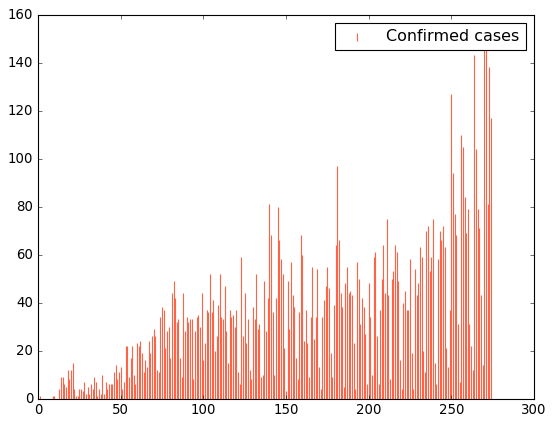

In [101]:
fig0= plt.figure(facecolor="white")
plt.stem(times, Sick, linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#plt.stem(times, Deaths, linefmt='orangered',markerfmt=" ",use_line_collection = True)
plt.legend(numpoints = 1)  # Add a legend.
plt.savefig(save_results_to+'NewCases_MiguelHidalgo.eps')

In [102]:
Sick=raw_incidence.to_numpy()

In [103]:
Sick=np.transpose(raw_incidence.to_numpy())

In [104]:
print(Sick.shape)
print(Sick.shape[0])
print(Sick.shape[1])

(16, 275)
16
275


In [105]:
ttime  = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
t_pred = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
times_pred = np.linspace(0.0,274,275)

In [106]:
n_days=Sick.shape[1]
n_pred=len(times_pred)

In [107]:
advi_results=pd.read_csv(save_results_to + "advi_results.csv",comment='#')

In [108]:
#print(advi_results.columns)
#print( advi_results.columns.tolist() )

In [109]:
fake_1 =advi_results.loc[:,"fake.1.1":"fake.275.1"]
fake_2 =advi_results.loc[:,"fake.1.2":"fake.275.2"]
fake_3 =advi_results.loc[:,"fake.1.3":"fake.275.3"]
fake_4 =advi_results.loc[:,"fake.1.4":"fake.275.4"]
fake_5 =advi_results.loc[:,"fake.1.5":"fake.275.5"]
fake_6 =advi_results.loc[:,"fake.1.6":"fake.275.6"]
fake_7 =advi_results.loc[:,"fake.1.7":"fake.275.7"]
fake_8 =advi_results.loc[:,"fake.1.8":"fake.275.8"]
fake_9 =advi_results.loc[:,"fake.1.9":"fake.275.9"]
fake_10=advi_results.loc[:,"fake.1.10":"fake.275.10"]
fake_11=advi_results.loc[:,"fake.1.11":"fake.275.11"]
fake_12=advi_results.loc[:,"fake.1.12":"fake.275.12"]
fake_13=advi_results.loc[:,"fake.1.13":"fake.275.13"]
fake_14=advi_results.loc[:,"fake.1.14":"fake.275.14"]
fake_15=advi_results.loc[:,"fake.1.15":"fake.275.15"]
fake_16=advi_results.loc[:,"fake.1.16":"fake.275.16"]

In [110]:
median_ppc=np.zeros((len(times_pred),Sick.shape[0]))
CriL_ppc  =np.zeros((len(times_pred),Sick.shape[0]))
CriU_ppc  =np.zeros((len(times_pred),Sick.shape[0]))

In [111]:
median_ppc[:,0]=np.percentile(fake_1,q=50.,axis=0)
CriL_ppc[:,0]  =np.percentile(fake_1,q=2.5,axis=0)
CriU_ppc[:,0]  =np.percentile(fake_1,q=97.5,axis=0)

median_ppc[:,1]=np.percentile(fake_2,q=50.,axis=0)
CriL_ppc[:,1]  =np.percentile(fake_2,q=2.5,axis=0)
CriU_ppc[:,1]  =np.percentile(fake_2,q=97.5,axis=0)

median_ppc[:,2]=np.percentile(fake_3,q=50.,axis=0)
CriL_ppc[:,2]  =np.percentile(fake_3,q=2.5,axis=0)
CriU_ppc[:,2]  =np.percentile(fake_3,q=97.5,axis=0)

median_ppc[:,3]=np.percentile(fake_4,q=50.,axis=0)
CriL_ppc[:,3]  =np.percentile(fake_4,q=2.5,axis=0)
CriU_ppc[:,3]  =np.percentile(fake_4,q=97.5,axis=0)

median_ppc[:,4]=np.percentile(fake_5,q=50.,axis=0)
CriL_ppc[:,4]  =np.percentile(fake_5,q=2.5,axis=0)
CriU_ppc[:,4]  =np.percentile(fake_5,q=97.5,axis=0)

median_ppc[:,5]=np.percentile(fake_6,q=50.,axis=0)
CriL_ppc[:,5]  =np.percentile(fake_6,q=2.5,axis=0)
CriU_ppc[:,5]  =np.percentile(fake_6,q=97.5,axis=0)

median_ppc[:,6]=np.percentile(fake_7,q=50.,axis=0)
CriL_ppc[:,6]  =np.percentile(fake_7,q=2.5,axis=0)
CriU_ppc[:,6]  =np.percentile(fake_7,q=97.5,axis=0)

median_ppc[:,7]=np.percentile(fake_8,q=50.,axis=0)
CriL_ppc[:,7]  =np.percentile(fake_8,q=2.5,axis=0)
CriU_ppc[:,7]  =np.percentile(fake_8,q=97.5,axis=0)

median_ppc[:,8]=np.percentile(fake_9,q=50.,axis=0)
CriL_ppc[:,8]  =np.percentile(fake_9,q=2.5,axis=0)
CriU_ppc[:,8]  =np.percentile(fake_9,q=97.5,axis=0)


median_ppc[:,9]=np.percentile(fake_10,q=50.,axis=0)
CriL_ppc[:,9]  =np.percentile(fake_10,q=2.5,axis=0)
CriU_ppc[:,9]  =np.percentile(fake_10,q=97.5,axis=0)

median_ppc[:,10]=np.percentile(fake_11,q=50.,axis=0)
CriL_ppc[:,10]  =np.percentile(fake_11,q=2.5,axis=0)
CriU_ppc[:,10]  =np.percentile(fake_11,q=97.5,axis=0)

median_ppc[:,11]=np.percentile(fake_12,q=50.,axis=0)
CriL_ppc[:,11]  =np.percentile(fake_12,q=2.5,axis=0)
CriU_ppc[:,11]  =np.percentile(fake_12,q=97.5,axis=0)


median_ppc[:,12]=np.percentile(fake_13,q=50.,axis=0)
CriL_ppc[:,12]  =np.percentile(fake_13,q=2.5,axis=0)
CriU_ppc[:,12]  =np.percentile(fake_13,q=97.5,axis=0)

median_ppc[:,13]=np.percentile(fake_14,q=50.,axis=0)
CriL_ppc[:,13]  =np.percentile(fake_14,q=2.5,axis=0)
CriU_ppc[:,13]  =np.percentile(fake_14,q=97.5,axis=0)

median_ppc[:,14]=np.percentile(fake_15,q=50.,axis=0)
CriL_ppc[:,14]  =np.percentile(fake_15,q=2.5,axis=0)
CriU_ppc[:,14]  =np.percentile(fake_15,q=97.5,axis=0)

median_ppc[:,15]=np.percentile(fake_16,q=50.,axis=0)
CriL_ppc[:,15]  =np.percentile(fake_16,q=2.5,axis=0)
CriU_ppc[:,15]  =np.percentile(fake_16,q=97.5,axis=0)

In [112]:
ppc_beta_s =advi_results["beta_s"]
ppc_beta_a =advi_results["beta_a"]
ppc_rho    =advi_results["rho"]
ppc_alpha  =advi_results["alpha"]
ppc_gamma  =advi_results["gamma"]
ppc_Theta  =advi_results["Theta"]

In [113]:
CriL_ppc_beta_s = np.percentile(ppc_beta_s,q=2.5,axis=0)
CriU_ppc_beta_s = np.percentile(ppc_beta_s,q=97.5,axis=0)

CriL_ppc_beta_a = np.percentile(ppc_beta_a,q=2.5,axis=0)
CriU_ppc_beta_a = np.percentile(ppc_beta_a,q=97.5,axis=0)

CriL_ppc_rho    = np.percentile(ppc_rho,q=2.5,axis=0)
CriU_ppc_rho    = np.percentile(ppc_rho,q=97.5,axis=0)


CriL_ppc_alpha  = np.percentile(ppc_alpha,q=2.5,axis=0)
CriU_ppc_alpha  = np.percentile(ppc_alpha,q=97.5,axis=0)

CriL_ppc_gamma  = np.percentile(ppc_gamma,q=2.5,axis=0)
CriU_ppc_gamma  = np.percentile(ppc_gamma,q=97.5,axis=0)

CriL_ppc_Theta  = np.percentile(ppc_Theta,q=2.5,axis=0)
CriU_ppc_Theta  = np.percentile(ppc_Theta,q=97.5,axis=0)

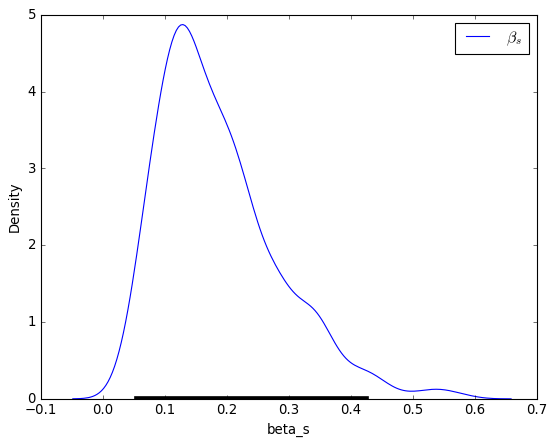

In [114]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_beta_s,label=r'$\beta_s$')
#    plt.axvline(x=CriL_ppc_beta_s,color='r',linestyle="--")
#    plt.axvline(x=CriU_ppc_beta_s,color='r',linestyle="--")
x_values = [CriL_ppc_beta_s, CriU_ppc_beta_s]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)
plt.legend()  # Add a legend.
plt.savefig(save_results_to + 'BayesianInterval-beta_s.eps')

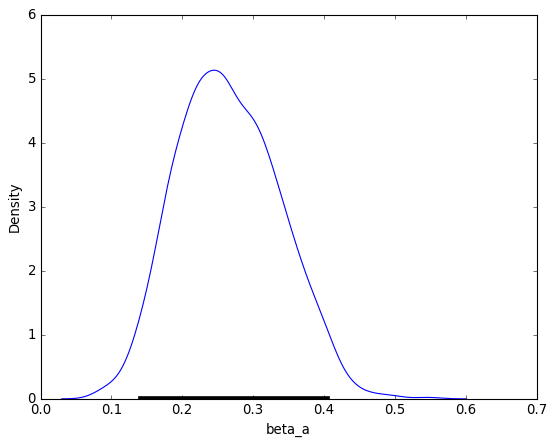

In [115]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_beta_a,label=r'$\beta_a$')
x_values = [CriL_ppc_beta_a, CriU_ppc_beta_a]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)  
plt.savefig(save_results_to + 'BayesianInterval-beta_a.eps')

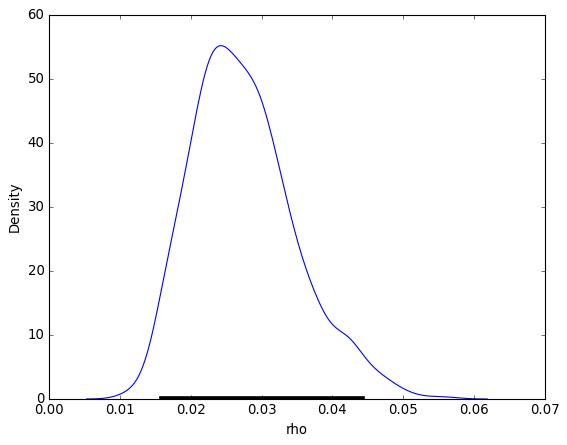

In [116]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_rho,label=r'$\rho$')
x_values = [CriL_ppc_rho, CriU_ppc_rho]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-rho.eps')

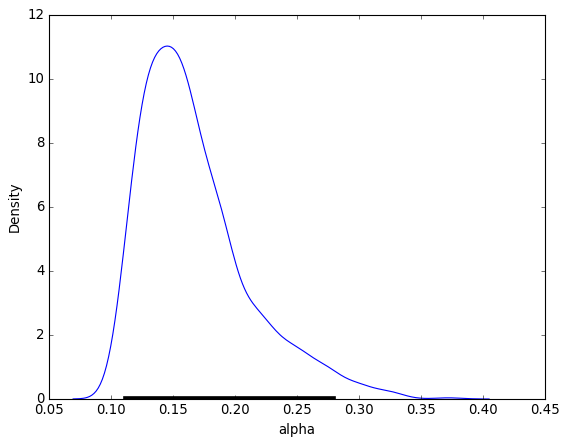

In [117]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_alpha,label=r'$\alpha$')
x_values = [CriL_ppc_alpha, CriU_ppc_alpha]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-alpha.eps')

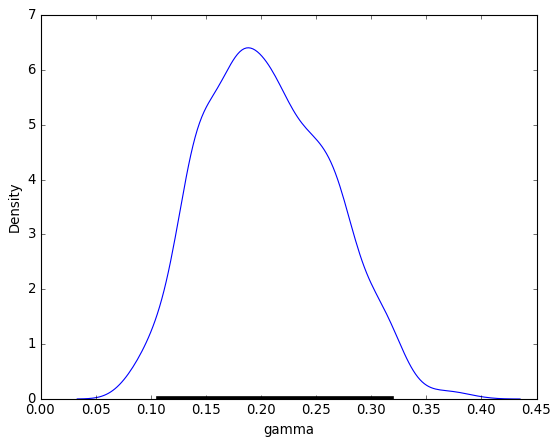

In [118]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_gamma,label=r'$\gamma$')
x_values = [CriL_ppc_gamma, CriU_ppc_gamma]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-gamma.eps')

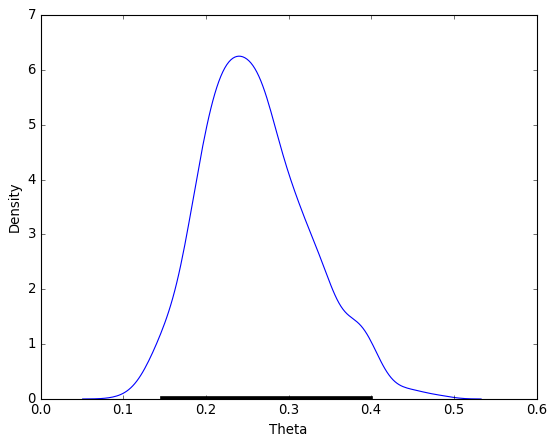

In [119]:
plt.figure(facecolor="white")
sns.kdeplot(data=ppc_Theta,label=r'$\theta$')
x_values = [CriL_ppc_Theta, CriU_ppc_Theta]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-Theta.eps')

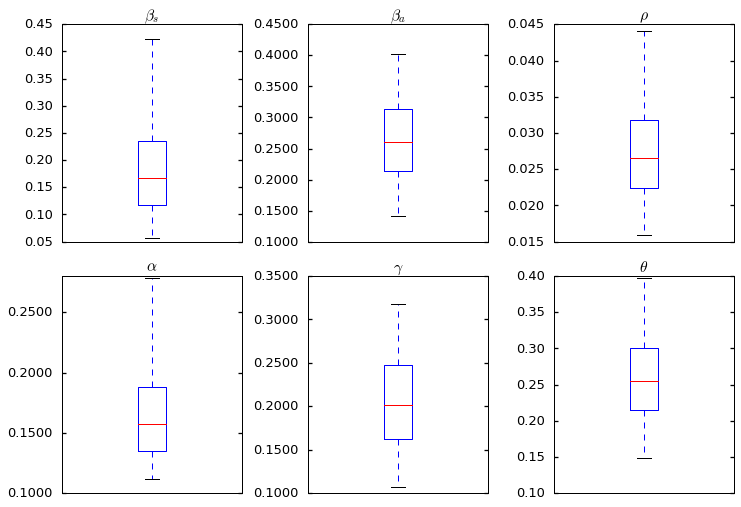

In [120]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
fig, axs = plt.subplots(2, 3)


axs[0, 0].boxplot(ppc_beta_s,whis=(2.5,97.5), sym='')
axs[0, 0].set_title(r'$\beta_s$')
axs[0, 0].set_xticks([])

axs[0, 1].boxplot(ppc_beta_a,whis=(2.5,97.5), sym='')
axs[0, 1].set_title(r'$\beta_a$')
axs[0, 1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:.4f}".format(float(x), ',')))
axs[0, 1].set_xticks([])

axs[0, 2].boxplot(ppc_rho,whis=(2.5,97.5), sym='')
axs[0, 2].set_title(r'$\rho$')
axs[0, 2].set_xticks([])

axs[1, 0].boxplot(ppc_alpha,whis=(2.5,97.5), sym='')
axs[1, 0].set_title(r'$\alpha$')
axs[1, 0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:.4f}".format(float(x), ',')))
axs[1, 0].set_xticks([])

axs[1, 1].boxplot(ppc_gamma,whis=(2.5,97.5), sym='')
axs[1, 1].set_title(r'$\gamma$')
axs[1, 1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:.4f}".format(float(x), ',')))
axs[1, 1].set_xticks([])

axs[1, 2].boxplot(ppc_Theta,whis=(2.5,97.5), sym='')
axs[1, 2].set_title(r'$\theta$')
axs[1, 2].set_xticks([])
#color ='violet'
plt.tight_layout()
plt.savefig(save_results_to+'Box_Params_MeanField.eps')

In [121]:
sampleT=advi_results.loc[:,"beta_s":"Theta"]

In [122]:
map=np.median(sampleT,axis=0)
range = np.array([(0.5*x,1.5*x) for x in map])

<Figure size 748.8x514.8 with 0 Axes>

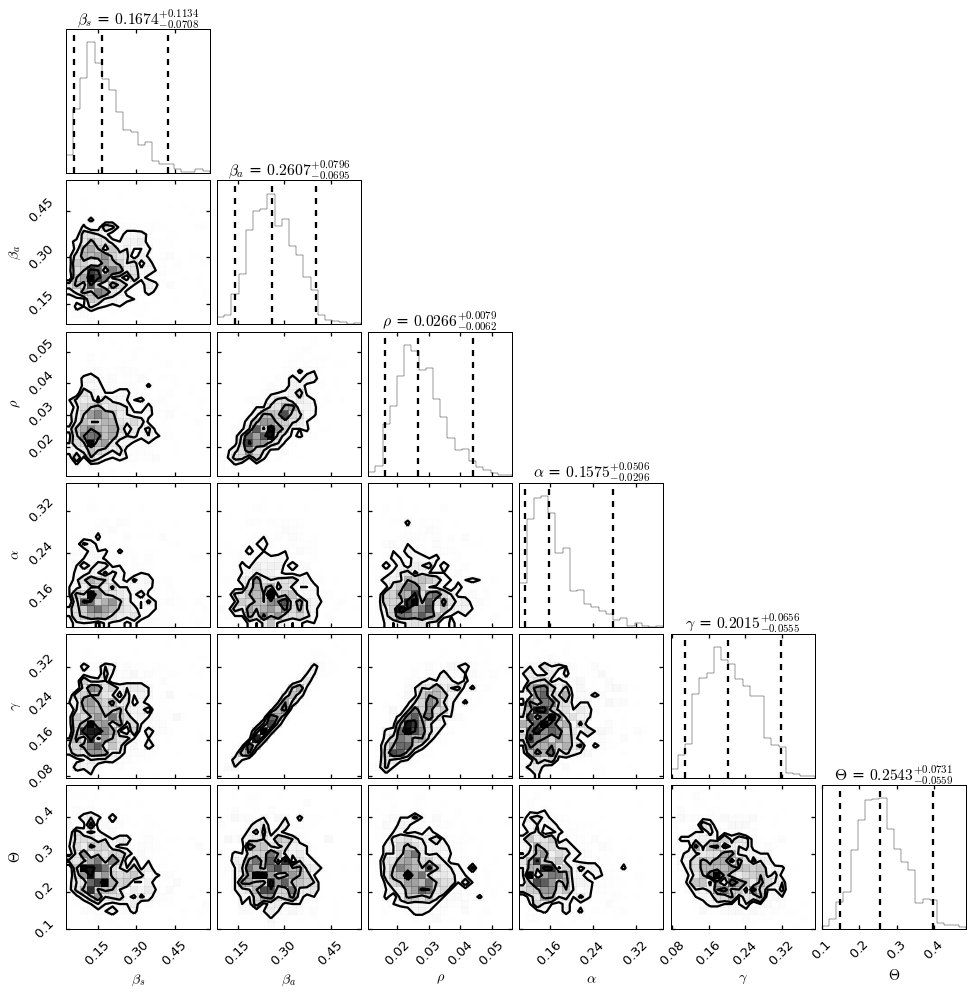

In [123]:
varnames=[r"$\beta_{s}$", r"$\beta_{a}$" , r"$\rho$" , r"$\alpha$",r"$\gamma$",r"$\Theta$"]
plt.figure()
corner.corner(sampleT,show_titles=True,labels=varnames,
                    plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
             use_math_text=True,title_fmt='.4f')
plt.savefig(save_results_to +'cornerCovMob0.pdf')

<Figure size 748.8x514.8 with 0 Axes>

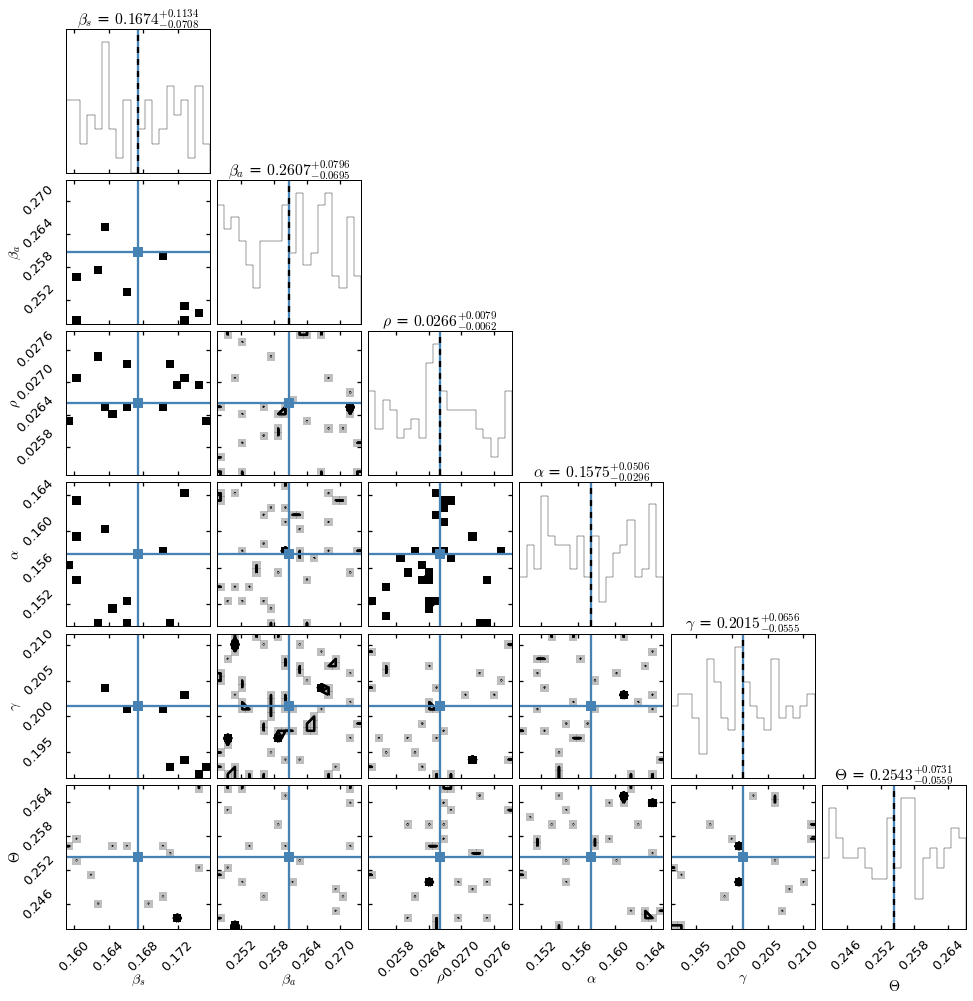

In [124]:
range = np.array([(0.95*x,1.05*x) for x in map])
plt.figure()
corner.corner(sampleT,show_titles=True,labels=varnames,truths=map,range=range,
                    plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
              use_math_text=True,title_fmt='.4f')
plt.savefig(save_results_to +'corner_CovMob1.pdf')

In [125]:
pd.options.display.float_format = "{:.4f}".format
df1 = advi_results.loc[:,"beta_s":"I16"].describe()
df2 = advi_results.loc[:,"phi.1":"phi.16"].describe()

In [126]:
df3 = df1.drop(["count"], axis=0)
df4 = df2.drop(["count"], axis=0)

In [127]:
df5 = df3.rename(columns={'beta_s': r"$\beta_{s}$", 'beta_a': r"$\beta_{a}$", 
                          'rho': r"$\rho$",'alpha': r"$\alpha$",
                          'gamma': r"$\gamma$",'Theta': r"$\theta$",
                          'E1': "$E_{10}$",'A1': r"$A_{10}$",'I1': r"$I_{10}$",
                          'E2': r"$E_{20}$",'A2': r"$A_{20}$",'I2': r"$I_{20}$",
                          'E3': r"$E_{30}$",'A3': r"$A_{30}$",'I3': r"$I_{30}$",
                          'E4': r"$E_{40}$",'A4': r"$A_{40}$",'I4': r"$I_{40}$", 
                          'E5': r"$E_{50}$",'A5': r"$A_{50}$",'I5': r"$I_{50}$",
                          'E6': r"$E_{60}$",'A6': r"$A_{60}$",'I6': r"$I_{60}$",
                          'E7': r"$E_{70}$",'A7': r"$A_{70}$",'I7': r"$I_{70}$",
                          'E8': r"$E_{80}$",'A8': r"$A_{80}$",'I8': r"$I_{80}$",
                          'E9': r"$E_{90}$",'A9': r"$A_{90}$",'I9': r"$I_{90}$",
                          'E10': r"$E_{100}$",'A10': r"$A_{100}$",'I10': r"$I_{100}$",
                          'E11': r"$E_{110}$",'A11': r"$A_{110}$",'I11': r"$I_{110}$",
                          'E12': r"$E_{120}$",'A12': r"$A_{120}$",'I12': r"$I_{120}$", 
                          'E13': r"$E_{130}$",'A13': r"$A_{130}$",'I13': r"$I_{130}$",
                          'E14': r"$E_{140}$",'A14': r"$A_{140}$",'I14': r"$I_{140}$",
                          'E15': r"$E_{150}$",'A15': r"$A_{150}$",'I15': r"$I_{150}$",
                          'E16': r"$E_{160}$",'A16': r"$A_{160}$",'I16': r"$I_{160}$"                            
                         })

In [128]:
df6 = df4.rename(columns={'phi.1': r"$\phi_{1}$", 'phi.2': r"$\phi_{2}$", 
                          'phi.3': r"$\phi_{3}$", 'phi.4': r"$\phi_{4}$", 
                          'phi.5': r"$\phi_{5}$", 'phi.6': r"$\phi_{6}$", 
                          'phi.7': r"$\phi_{7}$", 'phi.8': r"$\phi_{8}$",
                          'phi.9': r"$\phi_{9}$", 'phi.10': r"$\phi_{10}$", 
                          'phi.11': r"$\phi_{11}$", 'phi.12': r"$\phi_{12}$", 
                          'phi.13': r"$\phi_{13}$", 'phi.14': r"$\phi_{14}$", 
                          'phi.15': r"$\phi_{15}$", 'phi.16': r"$\phi_{16}$"                            
                         })

In [129]:
df5.T

,mean,std,min,25%,50%,75%,max
$\beta_{s}$,0.1874,0.0970,0.0252,0.1171,0.1674,0.2360,0.5859
$\beta_{a}$,0.2653,0.0714,0.0837,0.2130,0.2607,0.3143,0.5472
$\rho$,0.0275,0.0073,0.0108,0.0223,0.0266,0.0318,0.0563
$\alpha$,0.1675,0.0436,0.1023,0.1354,0.1575,0.1877,0.3721
$\gamma$,0.2057,0.0568,0.0761,0.1619,0.2015,0.2473,0.3923
$\theta$,0.2607,0.0644,0.0995,0.2147,0.2543,0.3003,0.4845
$E_{10}$,184.3217,146.0019,3.3820,77.4919,143.0350,249.2960,882.5690
$A_{10}$,535.6228,262.4267,18.3910,317.1770,544.1240,748.9410,996.0400
$I_{10}$,3.3211,4.1348,0.0710,0.9241,2.0098,4.0689,54.8012
$E_{20}$,205.7978,169.3601,5.8993,74.4260,160.9300,289.5120,889.7030


In [130]:
df6.T

,mean,std,min,25%,50%,75%,max
$\phi_{1}$,1.8436,0.3002,1.0792,1.6408,1.8291,2.0168,3.1128
$\phi_{2}$,1.6759,0.2968,0.8999,1.4518,1.6467,1.8684,2.9861
$\phi_{3}$,1.7297,0.3035,0.9696,1.5154,1.6951,1.8967,3.2856
$\phi_{4}$,1.3431,0.2549,0.6379,1.1646,1.3037,1.5075,2.5684
$\phi_{5}$,1.6994,0.2757,0.9961,1.5078,1.6978,1.8754,2.7680
$\phi_{6}$,1.1833,0.2087,0.6738,1.0365,1.1683,1.3095,2.0631
$\phi_{7}$,1.6808,0.3299,0.9035,1.4529,1.6388,1.8747,3.4941
$\phi_{8}$,1.3720,0.3556,0.5456,1.1323,1.3296,1.5667,3.3737
$\phi_{9}$,1.8103,0.4010,0.8205,1.5156,1.7761,2.0587,3.5184
$\phi_{10}$,1.2417,0.2775,0.6432,1.0491,1.2081,1.4146,2.3848


In [131]:
# with open(save_results_to + 'ModelParams_CovMob.tex','w') as tf:
#      tf.write(df5.T.to_latex())

In [132]:
#df5.T.to_latex(save_results_to + 'Params_CovMob.tex',encoding='utf-8', escape=False)
df5.T.to_latex(save_results_to + 'ModelParams_CovMob.tex', escape=False)

In [133]:
df6.T.to_latex(save_results_to + 'OverdispParams_CovMob.tex', escape=False)

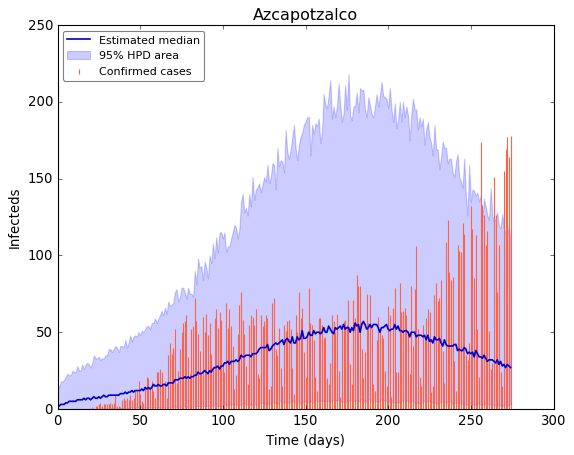

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Azcapotzalco"], linefmt='tomato', markerfmt=" ",basefmt=" ", label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,0],color='mediumblue', lw=1.5, label='Estimated median')
#plt.plot(times_pred,CriU_ppc[:,0], '--', color='b', lw=1.5)
#plt.plot(times_pred,CriL_ppc[:,0], '--', color='b', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Azcapotzalco")
plt.savefig(save_results_to + 'BandsPrediction_I_Azcapotzalco.pdf')

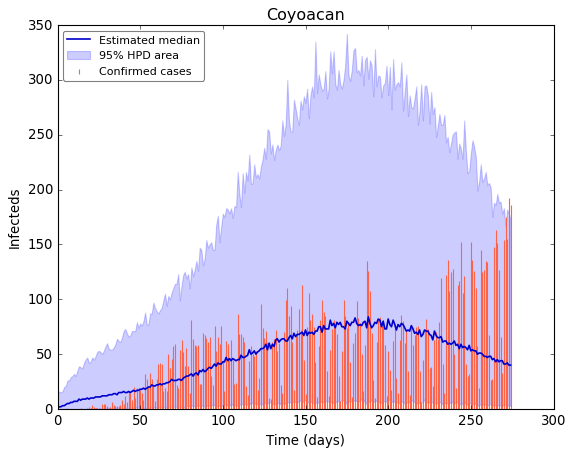

In [135]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Coyoacan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,1],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Coyoacan")
plt.savefig(save_results_to + 'BandsPrediction_I_Coyoacan.pdf')

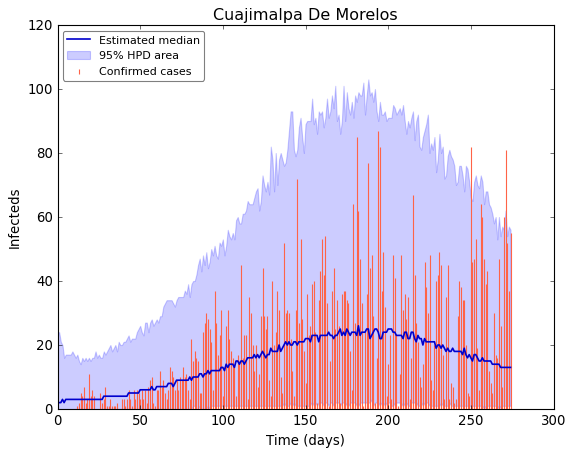

In [136]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["CuajimalpaDeMorelos"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,2],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,2], CriU_ppc[:,2], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Cuajimalpa De Morelos")
plt.savefig(save_results_to + 'BandsPrediction_I_CuajimalpaDeMorelos.pdf')

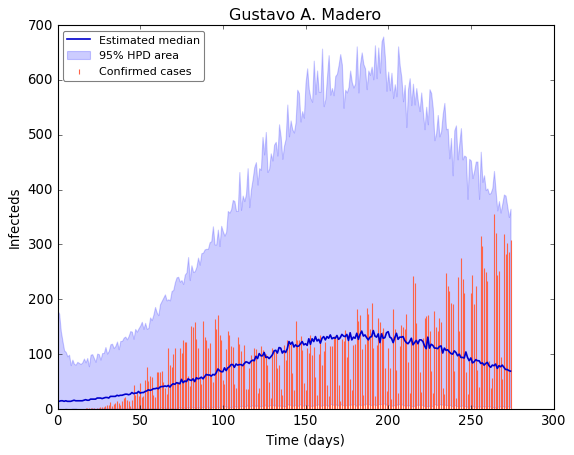

In [137]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["GustavoAMadero"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,3],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,3], CriU_ppc[:,3], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Gustavo A. Madero")
plt.savefig(save_results_to + 'BandsPrediction_I_GustavoAMadero.pdf')

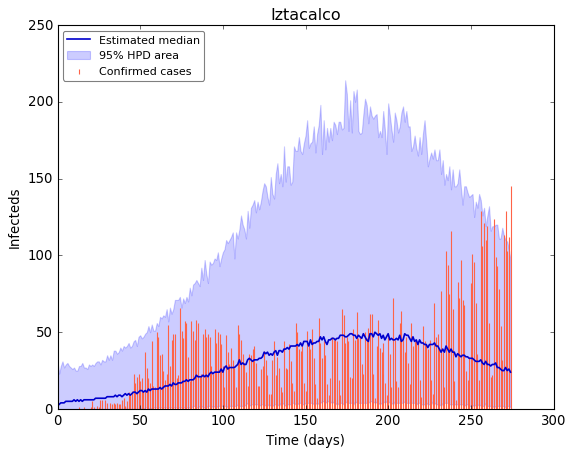

In [138]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Iztacalco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,4],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,4], CriU_ppc[:,4], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Iztacalco")
plt.savefig(save_results_to + 'BandsPrediction_I_Iztacalco.pdf')

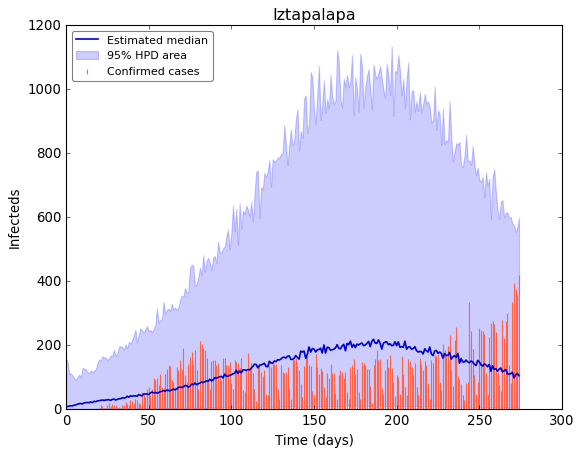

In [139]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Iztapalapa"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,5],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,5], CriU_ppc[:,5], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Iztapalapa")
plt.savefig(save_results_to + 'BandsPrediction_I_Iztapalapa.pdf')

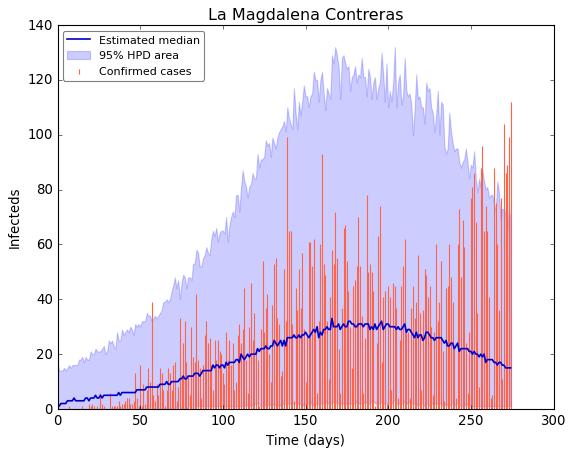

In [140]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["LaMagdalenaContreras"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,6],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,6], CriU_ppc[:,6], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("La Magdalena Contreras")
plt.savefig(save_results_to + 'BandsPrediction_I_LaMagdalenaContreras.pdf')

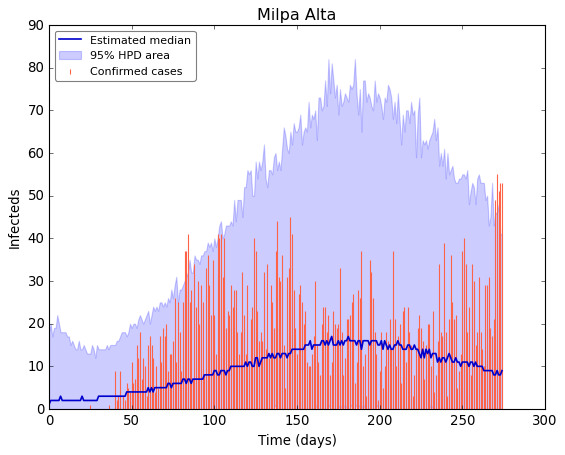

In [141]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["MilpaAlta"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,7],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,7], CriU_ppc[:,7], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Milpa Alta")
plt.savefig(save_results_to + 'BandsPrediction_I_MilpaAlta.pdf')

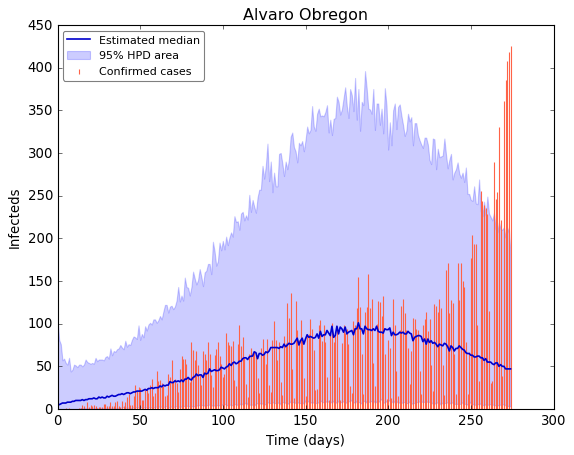

In [142]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["AlvaroObregon"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,8],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,8], CriU_ppc[:,8], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Alvaro Obregon")
plt.savefig(save_results_to + 'BandsPrediction_I_AlvaroObregon.pdf')

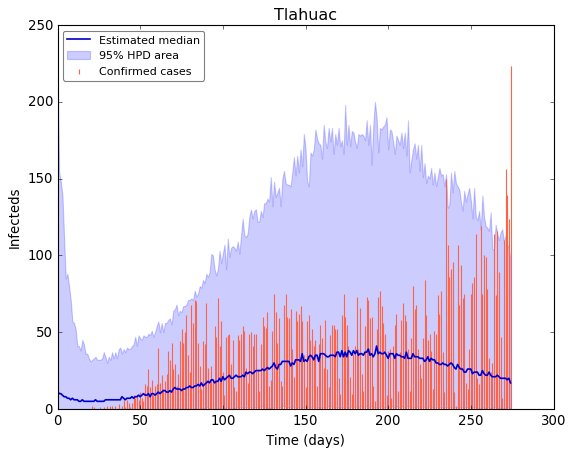

In [143]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Tlahuac"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,9],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,9], CriU_ppc[:,9], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Tlahuac")
plt.savefig(save_results_to + 'BandsPrediction_I_Tlahuac.pdf')

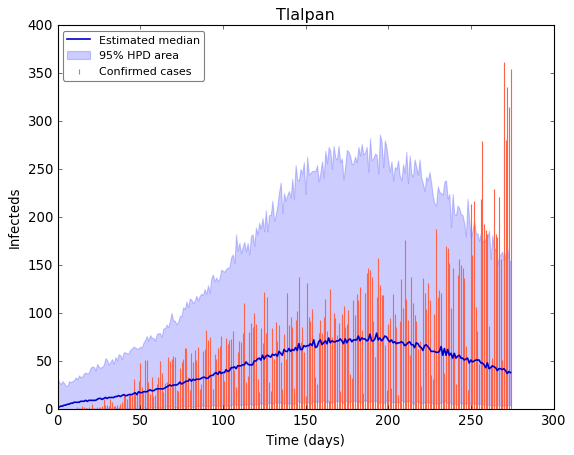

In [144]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Tlalpan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,10],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,10], CriU_ppc[:,10], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Tlalpan")
plt.savefig(save_results_to + 'BandsPrediction_I_Tlalpan.pdf')

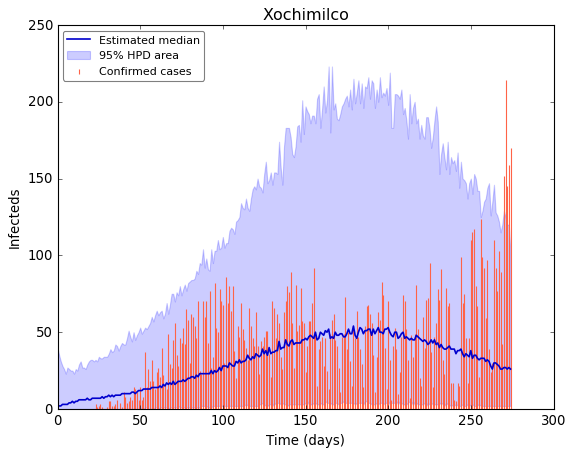

In [145]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Xochimilco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,11],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,11], CriU_ppc[:,11], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Xochimilco")
plt.savefig(save_results_to + 'BandsPrediction_I_Xochimilco.pdf')

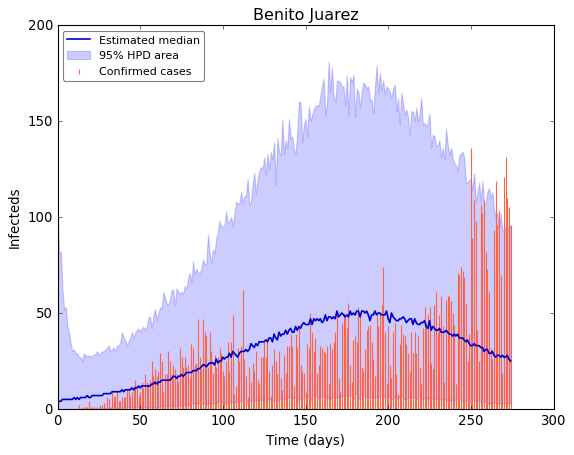

In [146]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["BenitoJuarez"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,12],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,12], CriU_ppc[:,12], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Benito Juarez")
plt.savefig(save_results_to + 'BandsPrediction_I_BenitoJuarez.pdf')

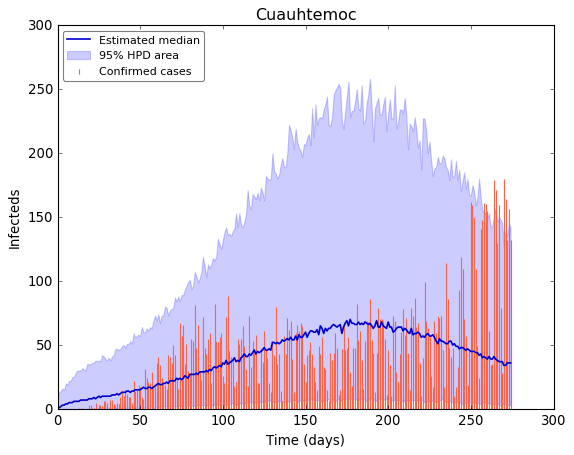

In [147]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["Cuauhtemoc"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,13],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,13], CriU_ppc[:,13], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Cuauhtemoc")
plt.savefig(save_results_to + 'BandsPrediction_I_Cuauhtemoc.pdf')

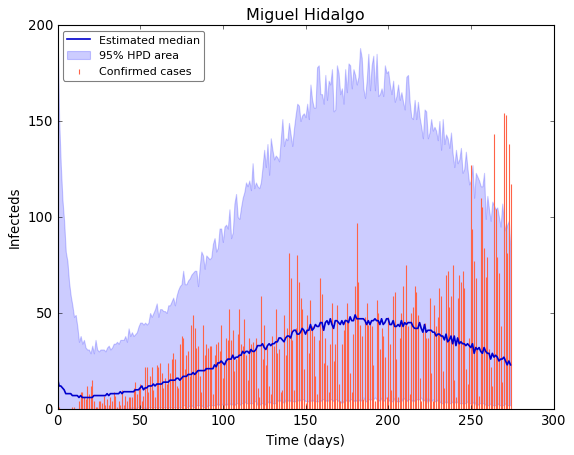

In [148]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["MiguelHidalgo"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,14],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,14], CriU_ppc[:,14], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Miguel Hidalgo")
plt.savefig(save_results_to + 'BandsPrediction_I_MiguelHidalgo.pdf')

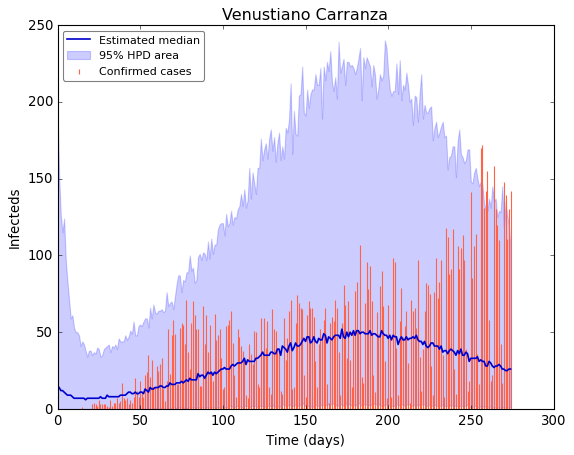

In [149]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(times, raw_incidence["VenustianoCarranza"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc[:,15],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_ppc[:,15], CriU_ppc[:,15], color='blue', alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2.set_title("Venustiano Carranza")
plt.savefig(save_results_to + 'BandsPrediction_I_VenustianoCarranza.pdf')

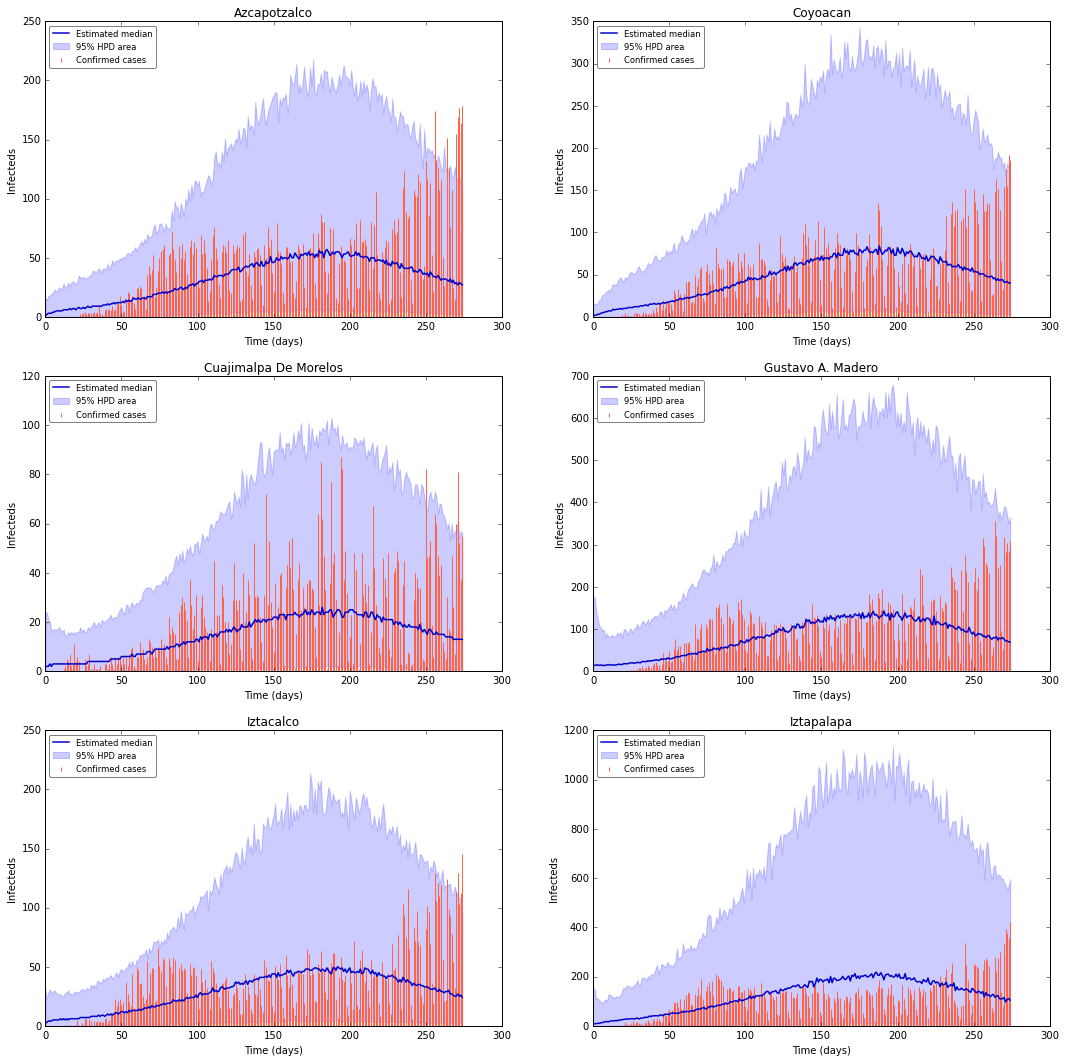

<Figure size 432x288 with 0 Axes>

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('classic')


fig, ax2 = plt.subplots(3, 2,figsize=(18, 18))
plt.figure(facecolor="white")

ax2[0, 0].stem(times, raw_incidence["Azcapotzalco"], linefmt='tomato', markerfmt=" ",basefmt=" ", label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[0, 0].plot(times_pred,median_ppc[:,0],color='mediumblue', lw=1.5, label='Estimated median')
#plt.plot(times_pred,CriU_ppc[:,0], '--', color='b', lw=1.5)
#plt.plot(times_pred,CriL_ppc[:,0], '--', color='b', lw=1.5)
ax2[0, 0].fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 0].set_title("Azcapotzalco")


ax2[0, 1].stem(times, raw_incidence["Coyoacan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[0, 1].plot(times_pred,median_ppc[:,1],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 1].fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 1].set_title("Coyoacan")


ax2[1, 0].stem(times, raw_incidence["CuajimalpaDeMorelos"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[1, 0].plot(times_pred,median_ppc[:,2],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 0].fill_between(times_pred, CriL_ppc[:,2], CriU_ppc[:,2], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 0].set_title("Cuajimalpa De Morelos")


ax2[1, 1].stem(times, raw_incidence["GustavoAMadero"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[1, 1].plot(times_pred,median_ppc[:,3],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 1].fill_between(times_pred, CriL_ppc[:,3], CriU_ppc[:,3], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 1].set_title("Gustavo A. Madero")



ax2[2, 0].stem(times, raw_incidence["Iztacalco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[2, 0].plot(times_pred,median_ppc[:,4],color='mediumblue', lw=1.5,label='Estimated median')
ax2[2, 0].fill_between(times_pred, CriL_ppc[:,4], CriU_ppc[:,4], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 0].set_title("Iztacalco")



ax2[2, 1].stem(times, raw_incidence["Iztapalapa"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[2, 1].plot(times_pred,median_ppc[:,5],color='mediumblue', lw=1.5,label='Estimated median')
ax2[2, 1].fill_between(times_pred, CriL_ppc[:,5], CriU_ppc[:,5], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 1].set_title("Iztapalapa")

plt.tight_layout()
plt.savefig(save_results_to + 'Alcaldias_1_6.pdf')

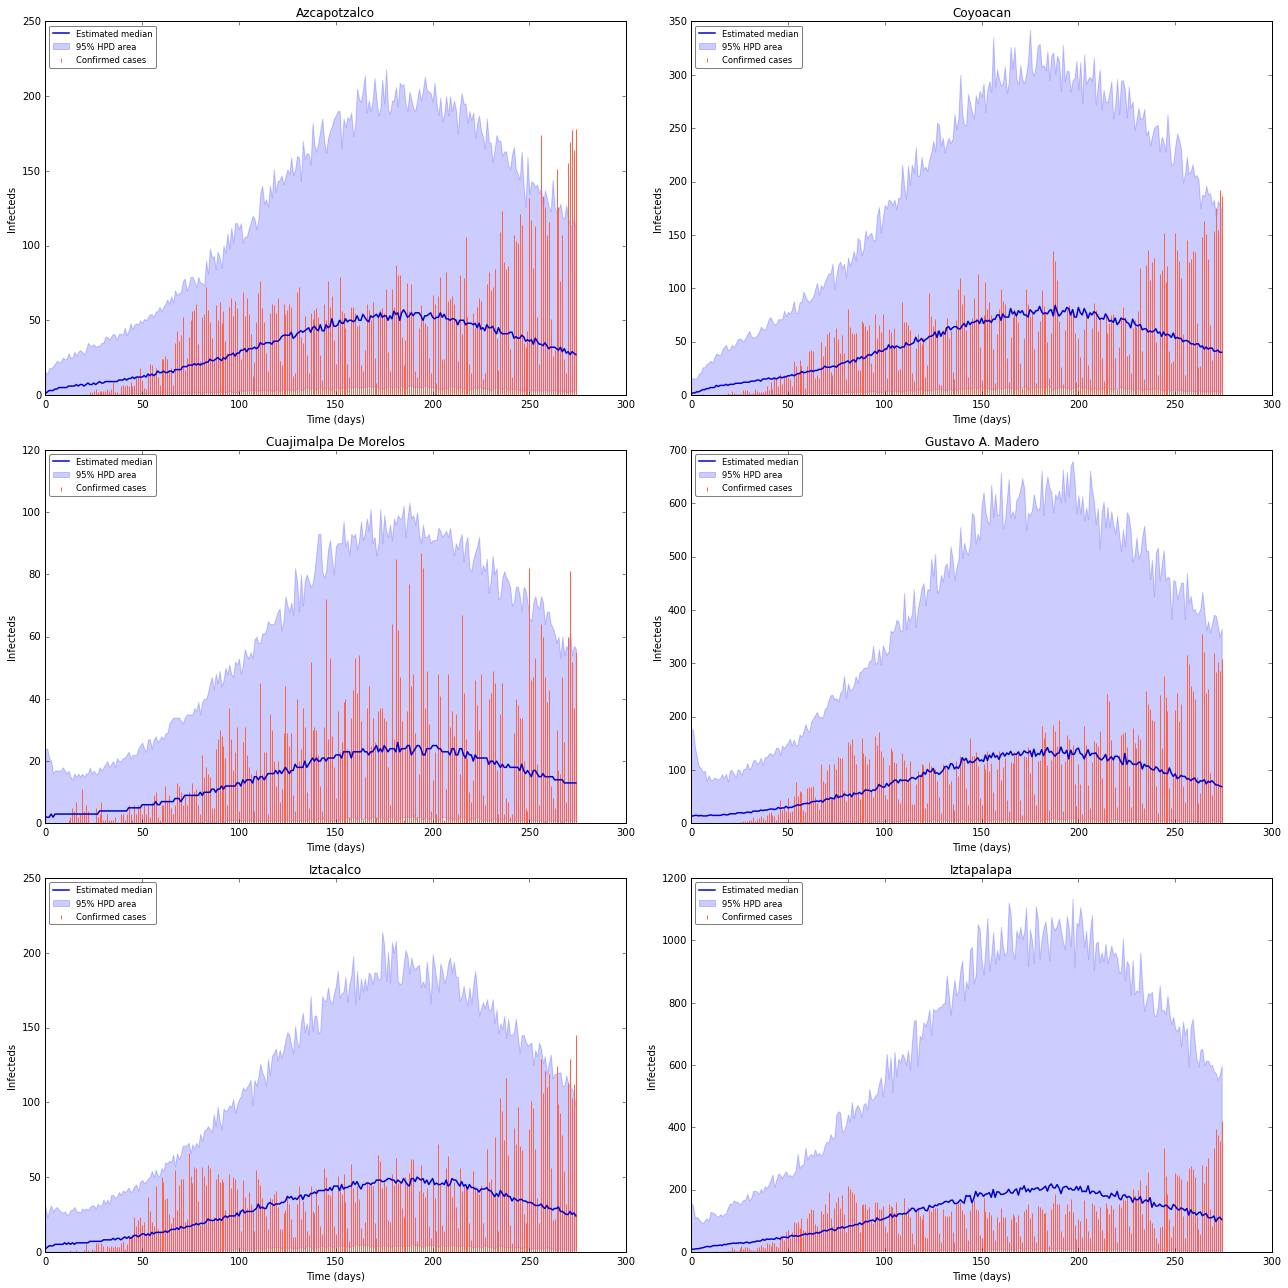

In [159]:
#%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('classic')


fig, ax2 = plt.subplots(3, 2,figsize=(18, 18))
#plt.figure(facecolor="white")

ax2[0, 0].stem(times, raw_incidence["Azcapotzalco"], linefmt='tomato', markerfmt=" ",basefmt=" ", label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[0, 0].plot(times_pred,median_ppc[:,0],color='mediumblue', lw=1.5, label='Estimated median')
#plt.plot(times_pred,CriU_ppc[:,0], '--', color='b', lw=1.5)
#plt.plot(times_pred,CriL_ppc[:,0], '--', color='b', lw=1.5)
ax2[0, 0].fill_between(times_pred, CriL_ppc[:,0], CriU_ppc[:,0], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 0].set_title("Azcapotzalco")


ax2[0, 1].stem(times, raw_incidence["Coyoacan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[0, 1].plot(times_pred,median_ppc[:,1],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 1].fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 1].set_title("Coyoacan")


ax2[1, 0].stem(times, raw_incidence["CuajimalpaDeMorelos"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[1, 0].plot(times_pred,median_ppc[:,2],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 0].fill_between(times_pred, CriL_ppc[:,2], CriU_ppc[:,2], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 0].set_title("Cuajimalpa De Morelos")


ax2[1, 1].stem(times, raw_incidence["GustavoAMadero"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[1, 1].plot(times_pred,median_ppc[:,3],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 1].fill_between(times_pred, CriL_ppc[:,3], CriU_ppc[:,3], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 1].set_title("Gustavo A. Madero")



ax2[2, 0].stem(times, raw_incidence["Iztacalco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases")
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[2, 0].plot(times_pred,median_ppc[:,4],color='mediumblue', lw=1.5,label='Estimated median')
ax2[2, 0].fill_between(times_pred, CriL_ppc[:,4], CriU_ppc[:,4], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 0].set_title("Iztacalco")



ax2[2, 1].stem(times, raw_incidence["Iztapalapa"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2[2, 1].plot(times_pred,median_ppc[:,5],color='mediumblue', lw=1.5,label='Estimated median')
ax2[2, 1].fill_between(times_pred, CriL_ppc[:,5], CriU_ppc[:,5], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 1].set_title("Iztapalapa")

plt.tight_layout()
plt.savefig(save_results_to + 'Alcaldias_1_6.pdf')

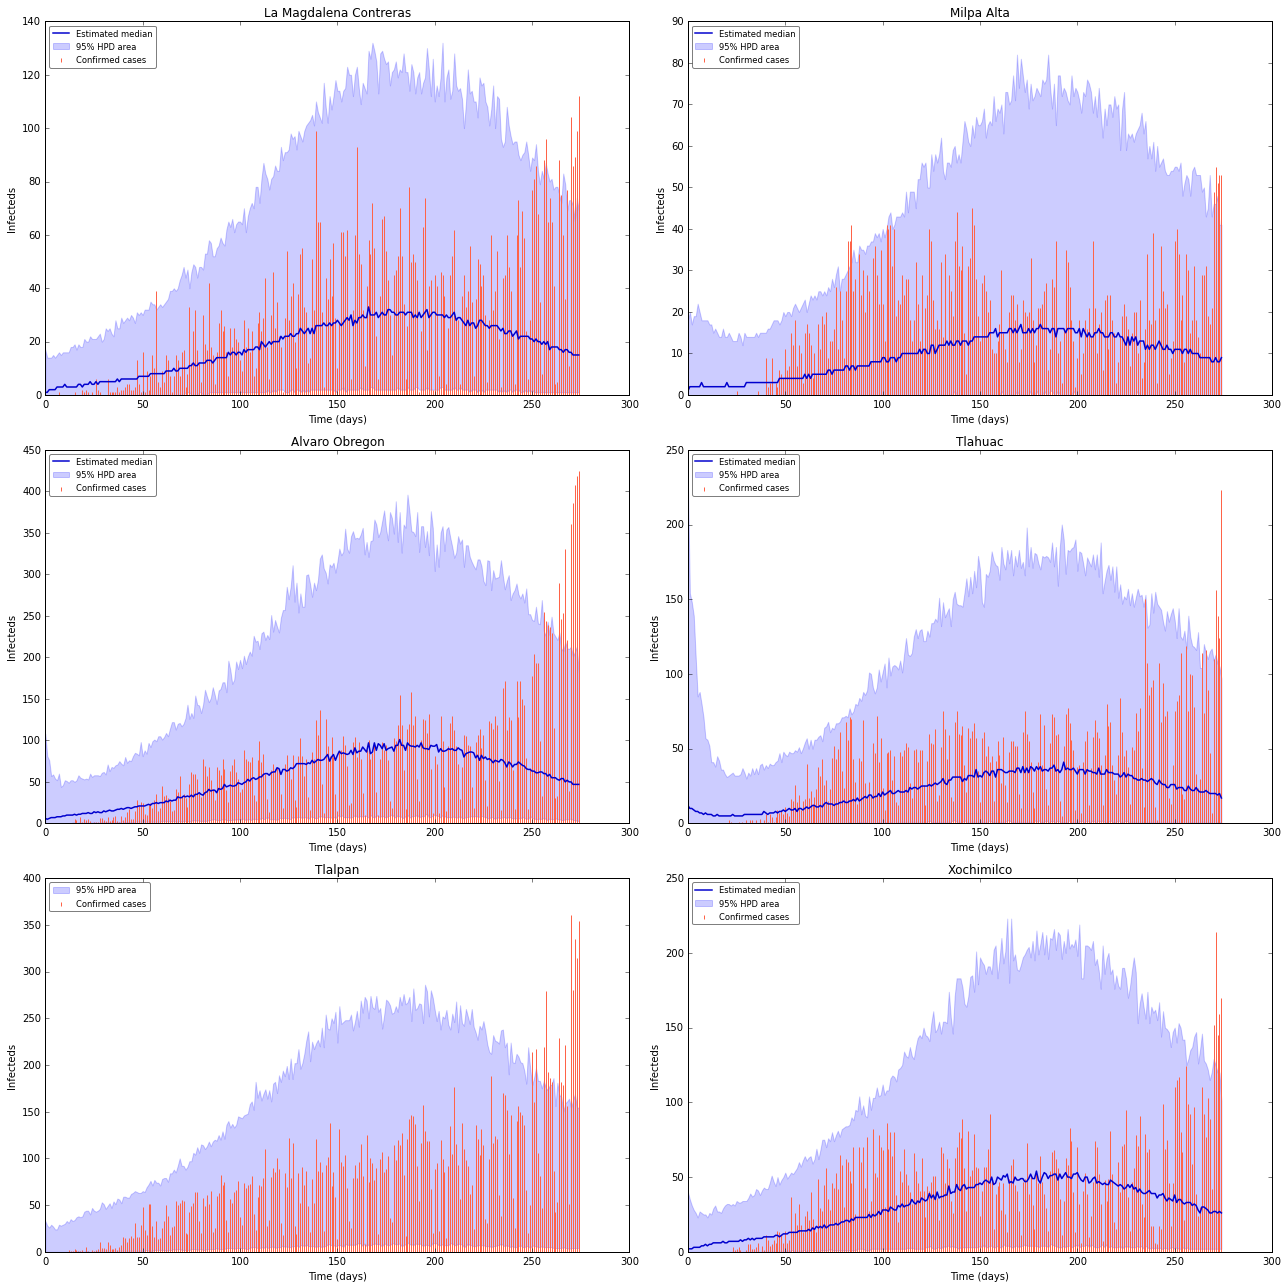

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('classic')


fig, ax2 = plt.subplots(3, 2,figsize=(18, 18))



ax2[0, 0].stem(times, raw_incidence["LaMagdalenaContreras"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[0, 0].plot(times_pred,median_ppc[:,6],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 0].fill_between(times_pred, CriL_ppc[:,6], CriU_ppc[:,6], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 0].set_title("La Magdalena Contreras")





ax2[0, 1].stem(times, raw_incidence["MilpaAlta"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[0, 1].plot(times_pred,median_ppc[:,7],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 1].fill_between(times_pred, CriL_ppc[:,7], CriU_ppc[:,7], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 1].set_title("Milpa Alta")



ax2[1, 0].stem(times, raw_incidence["AlvaroObregon"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[1, 0].plot(times_pred,median_ppc[:,8],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 0].fill_between(times_pred, CriL_ppc[:,8], CriU_ppc[:,8], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 0].set_title("Alvaro Obregon")



ax2[1, 1].stem(times, raw_incidence["Tlahuac"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
ax2[1, 1].plot(times_pred,median_ppc[:,9],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 1].fill_between(times_pred, CriL_ppc[:,9], CriU_ppc[:,9], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 1].set_title("Tlahuac")



ax2[2, 0].stem(times, raw_incidence["Tlalpan"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
ax2[2, 0].fill_between(times_pred, CriL_ppc[:,10], CriU_ppc[:,10], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 0].set_title("Tlalpan")



ax2[2, 1].stem(times, raw_incidence["Xochimilco"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases" )
ax2[2, 1].plot(times_pred,median_ppc[:,11],color='mediumblue', lw=1.5,label='Estimated median')
ax2[2, 1].fill_between(times_pred, CriL_ppc[:,11], CriU_ppc[:,11], color='blue', alpha=0.2, label='95% HPD area')
ax2[2, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[2, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[2, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[2, 1].set_title("Xochimilco")


plt.tight_layout()
plt.savefig(save_results_to + 'Alcaldias_7_12.pdf')

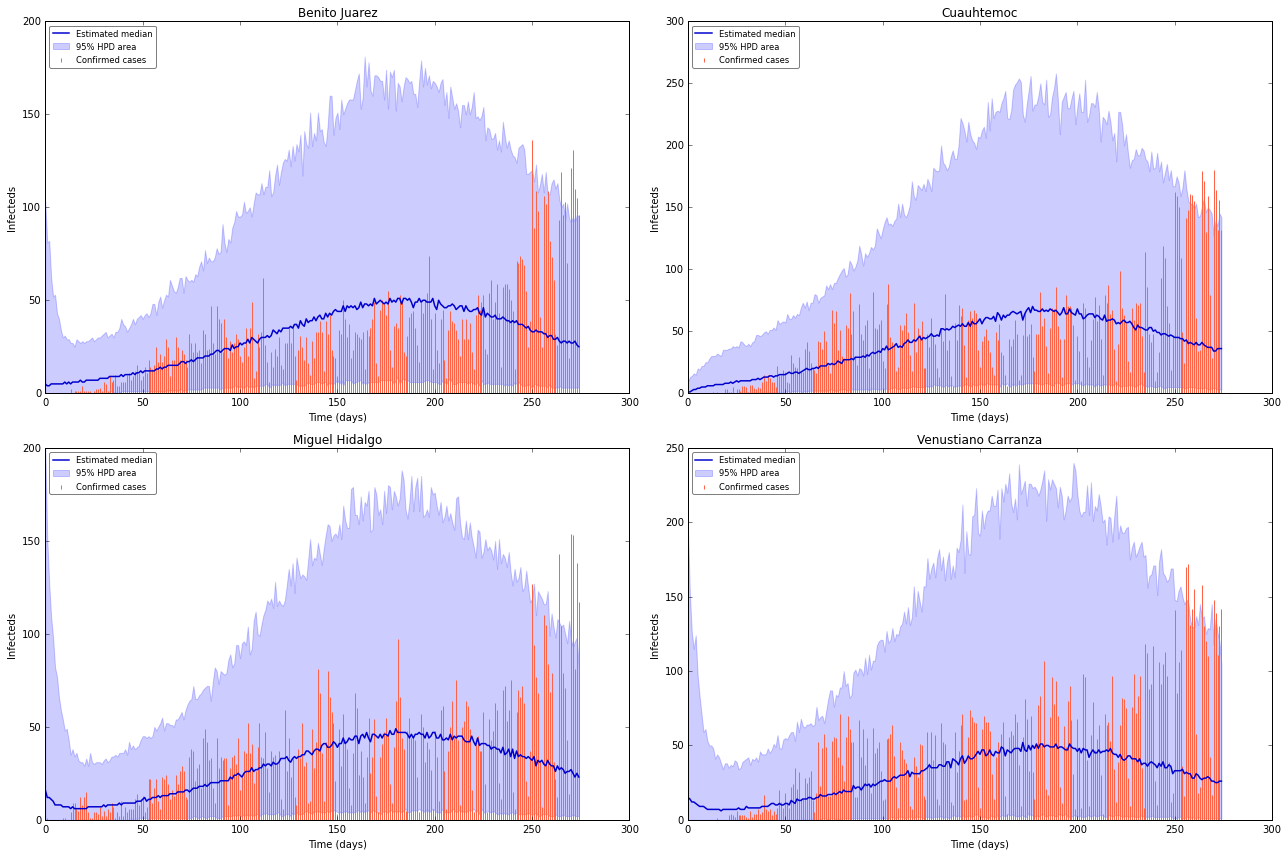

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('classic')


fig, ax2 = plt.subplots(2, 2,figsize=(18, 12))



ax2[0, 0].stem(times, raw_incidence["BenitoJuarez"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[0, 0].plot(times_pred,median_ppc[:,12],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 0].fill_between(times_pred, CriL_ppc[:,12], CriU_ppc[:,12], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 0].set_title("Benito Juarez")



ax2[0, 1].stem(times, raw_incidence["Cuauhtemoc"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[0, 1].plot(times_pred,median_ppc[:,13],color='mediumblue', lw=1.5,label='Estimated median')
ax2[0, 1].fill_between(times_pred, CriL_ppc[:,13], CriU_ppc[:,13], color='blue', alpha=0.2, label='95% HPD area')
ax2[0, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[0, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[0, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[0, 1].set_title("Cuauhtemoc")



ax2[1, 0].stem(times, raw_incidence["MiguelHidalgo"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[1, 0].plot(times_pred,median_ppc[:,14],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 0].fill_between(times_pred, CriL_ppc[:,14], CriU_ppc[:,14], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 0].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 0].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 0].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 0].set_title("Miguel Hidalgo")


ax2[1, 1].stem(times, raw_incidence["VenustianoCarranza"], linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed cases"  )
ax2[1, 1].plot(times_pred,median_ppc[:,15],color='mediumblue', lw=1.5,label='Estimated median')
ax2[1, 1].fill_between(times_pred, CriL_ppc[:,15], CriU_ppc[:,15], color='blue', alpha=0.2, label='95% HPD area')
ax2[1, 1].set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2[1, 1].set_ylabel('Infecteds')  # Add an x-label to the axes.
ax2[1, 1].legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,numpoints = 1 )  # Add a legend.
ax2[1, 1].set_title("Venustiano Carranza")


plt.tight_layout()
plt.savefig(save_results_to + 'Alcaldias_13_16.pdf')